In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-tweet-sentiment-analysis/bitcointweets.csv


In [102]:
import os
import cv2
import glob
import os.path
import skimage
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.backend as K
import matplotlib.pyplot as plt
from keras.models import Sequential
from skimage.transform import resize
from keras.callbacks import ModelCheckpoint
from keras.models import load_model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions


In [4]:
df = pd.read_csv('/kaggle/input/nlp-tweet-sentiment-analysis/bitcointweets.csv', header=None)


In [5]:
df.head()

0  \
0  Fri Mar 23 00:40:32 +0000 2018   
1  Fri Mar 23 00:40:34 +0000 2018   
2  Fri Mar 23 00:40:35 +0000 2018   
3  Fri Mar 23 00:40:36 +0000 2018   
4  Fri Mar 23 00:40:36 +0000 2018   

                                                   1               2      3  \
0  RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...  myresumerocket  16522   
1  @lopp @_Kevin_Pham @psycho_sage @naval But @Pr...        BitMocro   1295   
2  RT @tippereconomy: Another use case for #block...    hojachotopur   6090   
3                 free coins https://t.co/DiuoePJdap   denies_distro   2626   
4  RT @payvxofficial: WE are happy to announce th...      aditzgraha    184   

   4                                             5  \
0  0                                            []   
1  0                                  [u'Bitcoin']   
2  0  [u'blockchain', u'Tipper', u'TipperEconomy']   
3  0                                            []   
4  0                                            []   

                                                   6             7  
0  <a href="http://twitter.com" rel="nofollow">Tw...   ['neutral']  
1  <a href="http://twitter.com/download/android" ...   ['neutral']  
2  <a href="http://twitter.com" rel="nofollow">Tw...  ['positive']  
3  <a href="http://twitter.com" rel="nofollow">Tw...  ['positive']  
4  <a href="http://twitter.com/download/android" ...  ['positive']

In [6]:
df.describe()

3        4
count  5.085900e+04  50859.0
mean   5.200523e+03      0.0
std    6.538524e+04      0.0
min    0.000000e+00      0.0
25%    5.500000e+01      0.0
50%    3.930000e+02      0.0
75%    2.027000e+03      0.0
max    1.019444e+07      0.0

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50859 entries, 0 to 50858
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       50859 non-null  object
 1   1       50859 non-null  object
 2   2       50859 non-null  object
 3   3       50859 non-null  int64 
 4   4       50859 non-null  int64 
 5   5       50859 non-null  object
 6   6       50859 non-null  object
 7   7       50859 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.1+ MB


In [8]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [9]:

# Select the relevant columns for analysis
df = df.iloc[:, [1, 7]]

# Rename the columns for clarity
df.columns = ['tweet', 'label']

# Display the first few rows of the DataFrame
df.head()

tweet         label
0  RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...   ['neutral']
1  @lopp @_Kevin_Pham @psycho_sage @naval But @Pr...   ['neutral']
2  RT @tippereconomy: Another use case for #block...  ['positive']
3                 free coins https://t.co/DiuoePJdap  ['positive']
4  RT @payvxofficial: WE are happy to announce th...  ['positive']

In [13]:
df.label.unique()

array(["['neutral']", "['positive']", "['negative']"], dtype=object)

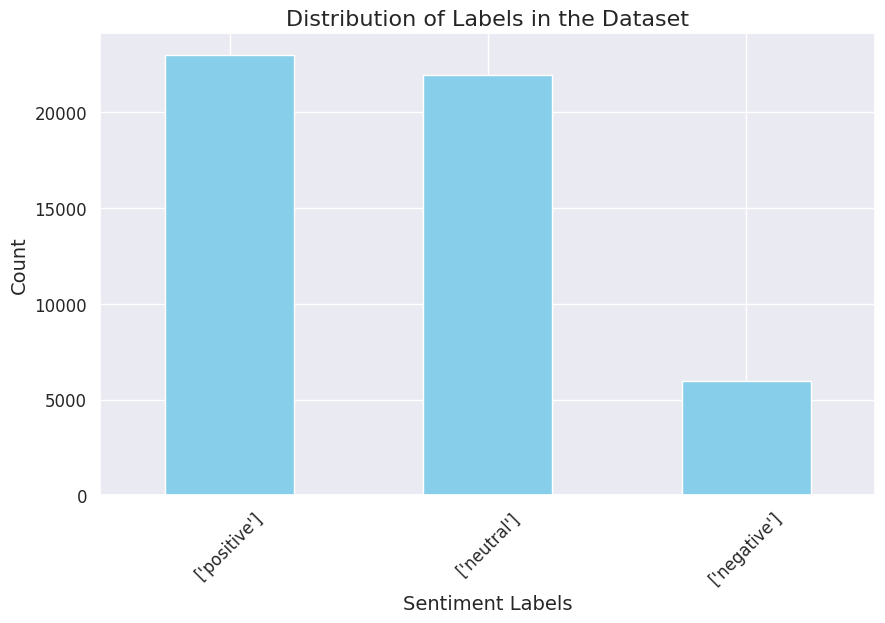

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Set the style for the plot
sns.set(style="darkgrid")

# Bar Graph
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Labels in the Dataset', fontsize=16)
plt.xlabel('Sentiment Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


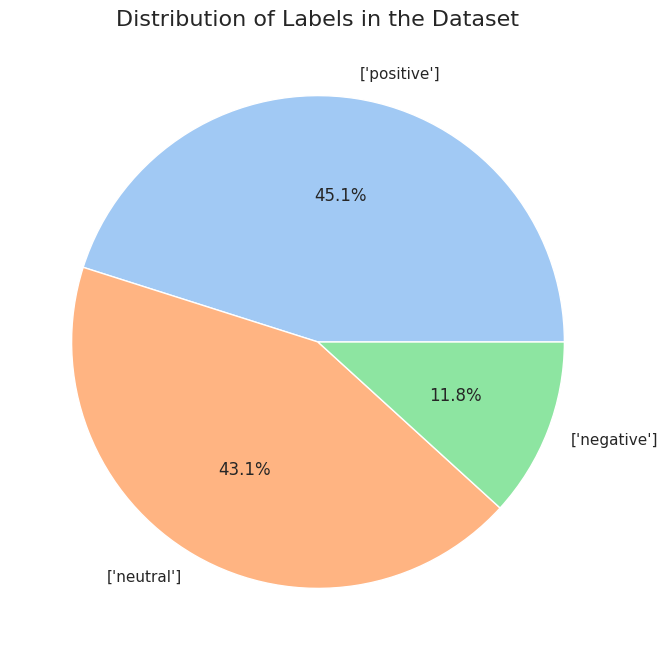

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Set the style for the plot
sns.set(style="darkgrid")

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Labels in the Dataset', fontsize=16)
plt.show()


# Before Cleaning TEXT

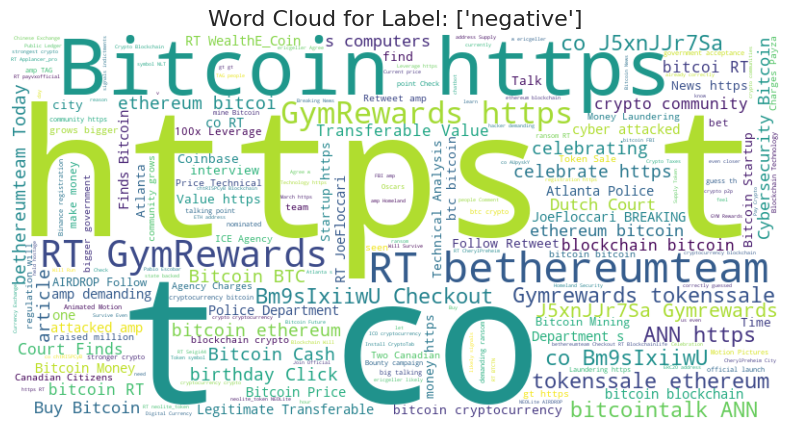

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df[df['label'] == "['neutral']"]['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud with the corresponding label class
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Label: {label_class}', fontsize=16)
plt.show()


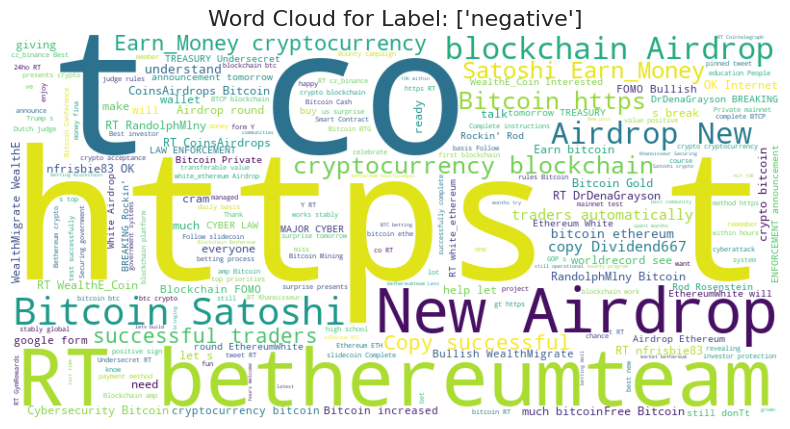

In [25]:


text = " ".join(df[df['label'] == "['positive']"]['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud with the corresponding label class
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Label: {label_class}', fontsize=16)
plt.show()


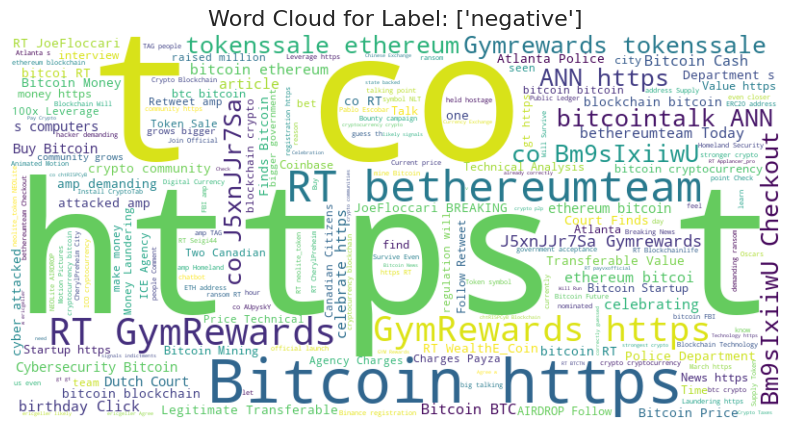

In [26]:


text = " ".join(df[df['label'] == "['neutral']"]['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud with the corresponding label class
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Label: {label_class}', fontsize=16)
plt.show()


# Lets perform some cleaning on dataset as we can see it is very noisy data

In [30]:
!pip install demoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.6 MB/s eta 0:00:00


In [84]:
import re
import string
import demoji
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Download the demoji library data
demoji.download_codes()

# Define a function to clean the text data
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove retweet tags and mentions
    text = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', text)
    text = re.sub(r'@\S+', '', text)
    
    # Remove emojis
    text = demoji.replace(text, '')
    
    # Remove special characters and symbols
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert all text to lowercase
    text = text.lower()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove any remaining noise
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    return text

# Apply the cleaning function to the 'text_data' column and generate a word cloud
df['cleaned_text'] = df['tweet'].apply(clean_text)  # Replace 'text_data' with your desired column name


/tmp/ipykernel_32/3750509795.py:8: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [85]:
df.head()

tweet         label  \
0  RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...   ['neutral']   
1  @lopp @_Kevin_Pham @psycho_sage @naval But @Pr...   ['neutral']   
2  RT @tippereconomy: Another use case for #block...  ['positive']   
3                 free coins https://t.co/DiuoePJdap  ['positive']   
4  RT @payvxofficial: WE are happy to announce th...  ['positive']   

                                        cleaned_text  
0  paul krugman nobel luddite tweak nose bitcoin ...  
1                 dum b ss said know nothing bitcoin  
2  another use case blockchain tipper tipperecono...  
3                                         free coins  
4  happy announce payvx presale phase 1 live sign...

In [86]:
# Encode Categorical Variable
X = df['cleaned_text']  # Replace 'clean_tweet' with 'cleaned_text' for clarity
y = pd.get_dummies(df['label']).values
num_classes = df['label'].nunique()


In [87]:
num_classes

3

In [88]:
X.head()

0    paul krugman nobel luddite tweak nose bitcoin ...
1                   dum b ss said know nothing bitcoin
2    another use case blockchain tipper tipperecono...
3                                           free coins
4    happy announce payvx presale phase 1 live sign...
Name: cleaned_text, dtype: object

In [89]:
y[:10]

array([[False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True]])

In [90]:
# Split Train Test sets
from sklearn.model_selection import train_test_split

# Concatenate X and y for the split
data = pd.concat([X, pd.DataFrame(y)], axis=1)

# Perform the split
train, test = train_test_split(data, test_size=0.2, stratify=y, random_state=42)

# Separate X_train, X_test, y_train, y_test
X_train, y_train = train['cleaned_text'], train.drop('cleaned_text', axis=1)
X_test, y_test = test['cleaned_text'], test.drop('cleaned_text', axis=1)


In [91]:
X_train.shape,  y_train.shape


((40687,), (40687, 3))

In [92]:
X_test.shape, y_test.shape

((10172,), (10172, 3))

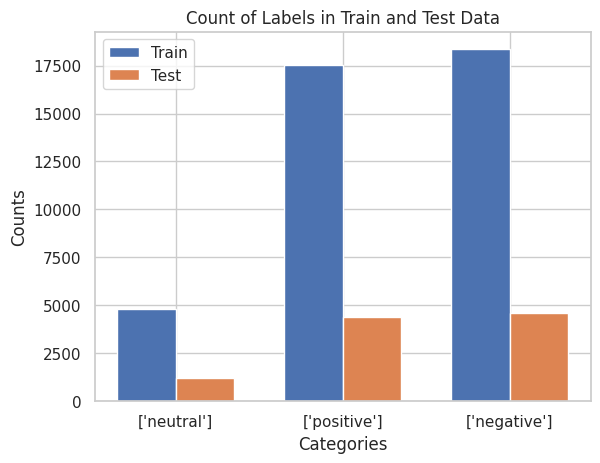

In [93]:
import matplotlib.pyplot as plt

# Assuming Y_train is a one-hot encoded array
label_counts_train = y_train.sum(axis=0)
label_counts_test = y_test.sum(axis=0)

# Plotting the bar graph
fig, ax = plt.subplots()
index = range(3)
bar_width = 0.35

rects1 = ax.bar(index, label_counts_train, bar_width, label='Train')
rects2 = ax.bar([i + bar_width for i in index], label_counts_test, bar_width, label='Test')

ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('Count of Labels in Train and Test Data')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(["['neutral']", "['positive']", "['negative']"])
ax.legend()

plt.show()

In [100]:
from keras.preprocessing.text import Tokenizer

# Set the maximum number of features
max_features = 20000

# Initialize the Tokenizer
tokenizer = Tokenizer(num_words=max_features, oov_token='<OOV>')  # Setting the out-of-vocabulary token

# Fit the Tokenizer on the training data
try:
    tokenizer.fit_on_texts(X_train)  # Fit the Tokenizer on the training data
except Exception as e:
    print(f"An error occurred during Tokenizer fitting: {e}")

# Convert the text data to sequences for both training and testing sets
try:
    X_train_sequences = tokenizer.texts_to_sequences(X_train)  # Convert training data to sequences
    X_test_sequences = tokenizer.texts_to_sequences(X_test)  # Convert testing data to sequences
except Exception as e:
    print(f"An error occurred during text to sequences conversion: {e}")


In [96]:
X_train_sequences[:10]

[[239, 174, 88, 239, 1402, 88],
 [44, 48, 46, 50, 76, 7, 81],
 [2833, 383, 3266, 7899, 1830, 2735, 3267, 3268, 2952, 4983],
 [2326, 144, 440, 125, 298, 449, 5619, 67, 643, 298, 6, 5, 8, 22, 328, 2],
 [174, 359, 88, 529, 20, 553, 768, 806, 13, 649, 834, 311, 210, 105, 420, 812],
 [397, 293, 434, 402, 226, 256, 443, 2, 15, 412, 2],
 [643, 7900, 2, 55, 567, 1028, 11015, 539, 976, 3900, 977, 11016],
 [1890, 1403, 7901, 2, 7902, 7, 7903, 2, 7, 184, 191, 3, 6],
 [9, 4, 11017, 187, 9, 4, 47, 126, 7904, 54, 4169],
 [17, 37, 64, 70, 2, 17, 78]]

In [101]:
from tensorflow.keras.preprocessing import sequence

max_words = 30

# Apply padding to the sequences
try:
    X_train_padded = sequence.pad_sequences(X_train_sequences, maxlen=max_words, padding='post', truncating='post')  # Apply padding to training sequences
    X_test_padded = sequence.pad_sequences(X_test_sequences, maxlen=max_words, padding='post', truncating='post')  # Apply padding to testing sequences
except Exception as e:
    print(f"An error occurred during sequence padding: {e}")

print(X_train_padded.shape, X_test_padded.shape)


(40687, 30) (10172, 30)


In [117]:
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000
embed_dim = 100

K.clear_session()
model = keras.Sequential()

# Embedding Layer
model.add(layers.Embedding(max_features, embed_dim, input_length=X_train_padded.shape[1]))

# Convolutional Layers
model.add(layers.Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))

# LSTM Layer
model.add(layers.LSTM(100, return_sequences=True))
model.add(layers.LSTM(100))

# Fully Connected Layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))

# Output Layer
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [118]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           2000000   
                                                                 
 conv1d (Conv1D)             (None, 30, 64)            19264     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 128)           0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 7, 100)            9

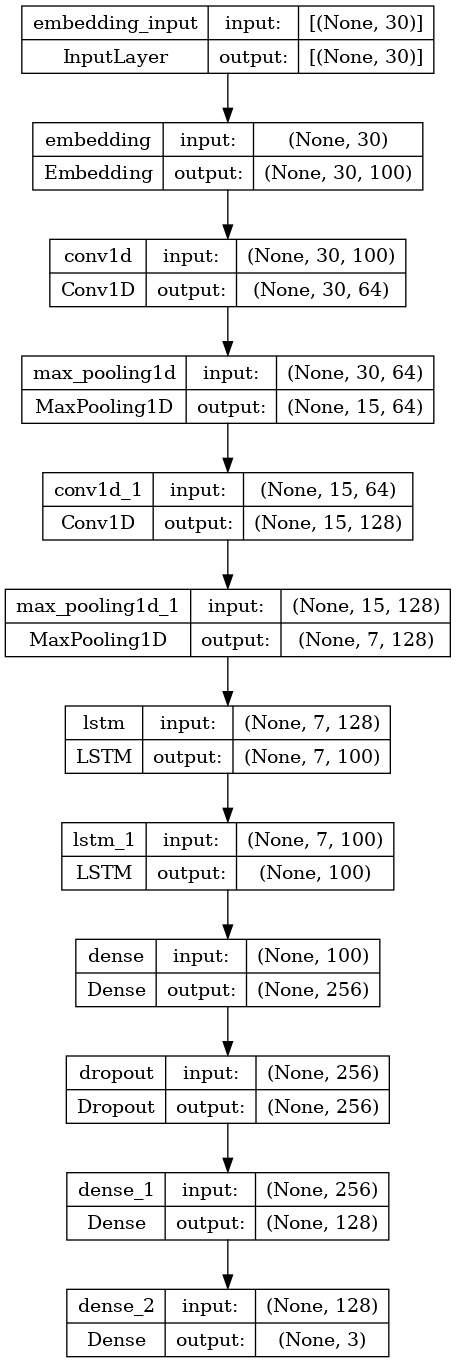

In [119]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture as a PNG image
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [120]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(filepath='best_model.h5',
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  mode='max',
                                  verbose=1)


In [121]:
# Train the model with the ModelCheckpoint callback
training_history = model.fit(X_train_padded, y_train,
                                batch_size=64,
                                epochs=100,
                                shuffle=True,
                                validation_data=(X_test_padded, y_test),
                                callbacks=[model_checkpoint],
                                verbose=2)

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.96638, saving model to best_model.h5
636/636 - 35s - loss: 0.2834 - accuracy: 0.8862 - val_loss: 0.1200 - val_accuracy: 0.9664 - 35s/epoch - 55ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.96638 to 0.97149, saving model to best_model.h5
636/636 - 9s - loss: 0.0665 - accuracy: 0.9805 - val_loss: 0.1032 - val_accuracy: 0.9715 - 9s/epoch - 14ms/step
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.97149
636/636 - 7s - loss: 0.0331 - accuracy: 0.9905 - val_loss: 0.1294 - val_accuracy: 0.9679 - 7s/epoch - 11ms/step
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.97149
636/636 - 7s - loss: 0.0185 - accuracy: 0.9946 - val_loss: 0.1512 - val_accuracy: 0.9617 - 7s/epoch - 11ms/step
Epoch 5/100

Epoch 5: val_accuracy did not improve from 0.97149
636/636 - 6s - loss: 0.0169 - accuracy: 0.9956 - val_loss: 0.1373 - val_accuracy: 0.9702 - 6s/epoch - 9ms/step
Epoch 6/100

Epoch 6: val_accuracy did not improve f

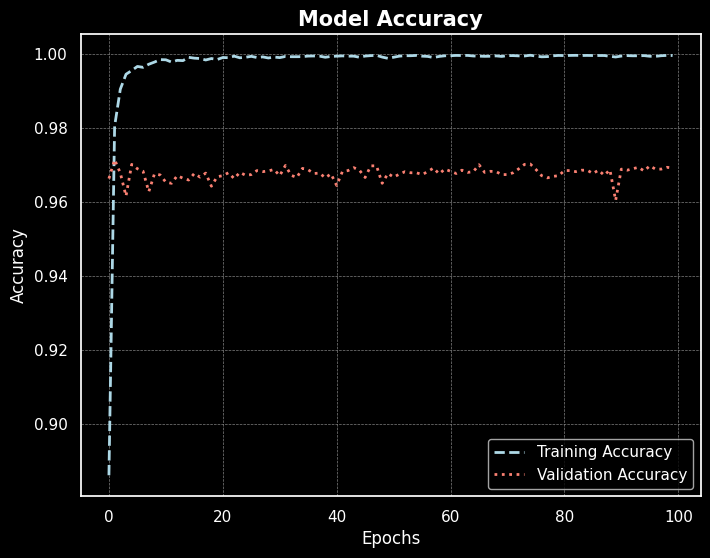

In [122]:
# Setting the plot style
plt.style.use('dark_background')

# Plotting the accuracy
plt.figure(figsize=(8, 6))
plt.plot(training_history.history['accuracy'], label='Training Accuracy', color='lightblue', linestyle='dashed', linewidth=2)
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy', color='salmon', linestyle='dotted', linewidth=2)
plt.title('Model Accuracy', fontsize=15, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

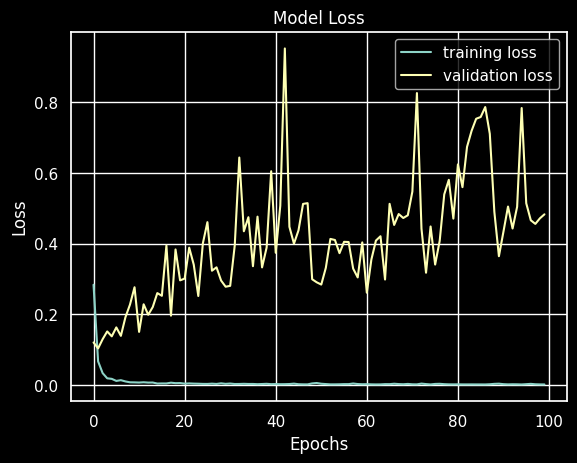

In [123]:
# Plotting the loss
plt.figure(1)
plt.plot(training_history.history['loss'], label='training loss')  # Changed 'history' to 'training_history'
plt.plot(training_history.history['val_loss'], label='validation loss')  # Changed 'history' to 'training_history'
plt.title('Model Loss')  # Modified the title
plt.xlabel('Epochs')  # Modified the x-label
plt.ylabel('Loss')  # Modified the y-label
plt.legend()
plt.show()

In [126]:
from sklearn.metrics import accuracy_score

y_predicted = model.predict(X_test_padded)
y_predicted = (y_predicted > 0.45)
accuracy = accuracy_score(y_predicted, y_test)
print("Accuracy with test data: ", accuracy * 100, "%")

318/318 [==============================] - 2s 3ms/step
Accuracy with test data:  96.88360204482895 %


In [127]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1197
           1       0.96      0.98      0.97      4388
           2       0.98      0.97      0.98      4587

   micro avg       0.97      0.97      0.97     10172
   macro avg       0.97      0.95      0.96     10172
weighted avg       0.97      0.97      0.97     10172
 samples avg       0.97      0.97      0.97     10172



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
# Serialize the model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
model.save_weights("model_weights.h5")
model.save('model.h5')

import pickle

# Saving the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [130]:
# Loading the tokenizer (for example)
with open('tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

loaded_model = load_model('model.h5')

def preprocess_text(comment):
    # Add the same preprocessing steps you applied to the training data
    clean_comment = clean_text(comment)
    tokenized_comment = loaded_tokenizer.texts_to_sequences([clean_comment])
    padded_comment = sequence.pad_sequences(tokenized_comment, maxlen=max_words)
    return padded_comment

def make_prediction(comment, model):
    preprocessed_comment = preprocess_text(comment)
    prediction = np.argmax(loaded_model.predict(preprocessed_comment), axis=1)
    if prediction == 0:
        return "Negative"
    elif prediction == 1:
        return "Neutral"
    elif prediction == 2:
        return "Positive"
    else:
        return "Unknown"


In [131]:

# Example usage of the function
comment_to_predict = "This is a great day."
prediction_result = make_prediction(comment_to_predict, model)
print("The sentiment prediction for the comment is:", prediction_result)


1/1 [==============================] - 1s 770ms/step
The sentiment prediction for the comment is: Neutral


In [132]:

# Example usage of the function
comment_to_predict = "This is a great day. Feeling good and happy"
prediction_result = make_prediction(comment_to_predict, model)
print("The sentiment prediction for the comment is:", prediction_result)


1/1 [==============================] - 0s 21ms/step
The sentiment prediction for the comment is: Positive


In [136]:

# Example usage of the function
comment_to_predict = "Not feeling well today; it's a very bad and disgusting day."
prediction_result = make_prediction(comment_to_predict, model)
print("The sentiment prediction for the comment is:", prediction_result)


1/1 [==============================] - 0s 20ms/step
The sentiment prediction for the comment is: Negative
